In [64]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [74]:
import numpy as np

data = np.array([[1.0, 3.0], [2.0, 1.0], [3.5,4.], [5., 0.], [6., 0.5], [9., -2.], [9.5, -3.0]])


def h(i):
    return data[i+1][0] - data[i][0]

def b(i):
    return (6/h(i)) * (data[i+1][1] - data[i][1])

def u(i):
    if i == 1:
        return 2*(h(i-1) + h(i))
    return 2*(h(i-1) + h(i)) - (h(i-1)**2)/u(i-1)

def v(i):
    if i == 1:
        return b(i) - b(i-1)
    return b(i) - b(i-1) - h(i-1) * (v(i-1)/u(i-1))


def z(i):
    if i == 0 or i == len(data)-1:
        return 0
    else:
        return (v(i) - h(i)*z(i+1))/u(i)
    

'''def x(i):
    #return h(i-1) * 2*(h(i-1) + h(i))*z(i) + h(i) * z(i+1) - (6*(data[i+1][1] - data[i][1]))/h(i) - (6*(data[i][1] - data[i-1][1]))/h(i-1)
    return h(i-1)*z(i-1) + u(i)*z(i) + h(i)*z(i+1) - b(i) + b(i-1)'''

def A(i):
    return (z(i+1) - z(i))/(6*h(i))

def B(i):
    return z(i)/2

def C(i):
    return (-h(i)/6) * (z(i+1)+2*z(i)) + (data[i+1][1] - data[i][1])/h(i)


def S(i, x):
    return data[i][1] + (x - data[i][0]) * (C(i) + (x-data[i][0]) * (B(i) + (x-data[i][0])*A(i)))


In [35]:
for i in range(1, len(data)-1):
    try:
        print(z(i))
    except:
        print(f'Nie da sie dla i = {i}')

7.236321303841677
-8.121071012805588
6.581296080714009
-1.7248738843616611
-0.2607683352735739


In [13]:
'''for i in range(1, len(data)-1):
    try:
        print(x(i))
    except:
        print(f'Nie da sie dla i = {i}')'''

3.552713678800501e-15
3.6544819557625168
-2.6680930056948675
0.37541372777283044
0.3015688231054927


[1 2 3 4 5]


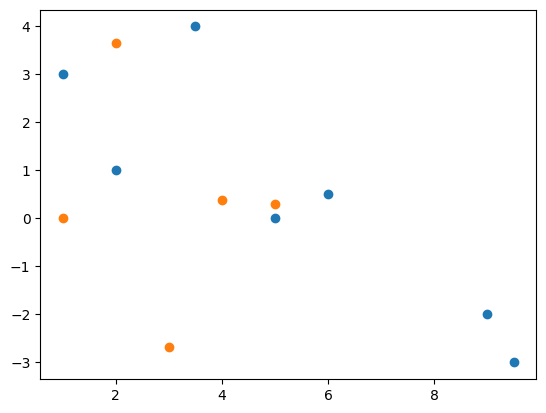

In [36]:
x_space = np.array(range(1,len(data)-1))
print(x_space)
plt.scatter(data[: ,0], data[: ,1])
plt.scatter(x_space, [x(i) for i in range(1, len(data)-1)])
plt.show()

In [54]:
hs = np.array([h(i) for i in range(len(data)-1)])
bs = np.array([b(i) for i in range(len(data)-1)])
us = np.array([u(i) for i in range(1,len(data)-1)])
vs = np.array([v(i) for i in range(1,len(data)-1)])
zs = np.array([z(i) for i in range(len(data)-1)])

print(hs)
print(bs)
print(us)
print(vs)
print(zs)

[1.  1.5 1.5 1.  3.  0.5]
[-12.  12. -16.   3.  -5. -12.]
[5.         5.55       4.59459459 7.78235294 5.84353741]
[ 24.         -35.2         28.51351351 -14.20588235  -1.52380952]
[ 0.          7.2363213  -8.12107101  6.58129608 -1.72487388 -0.26076834]


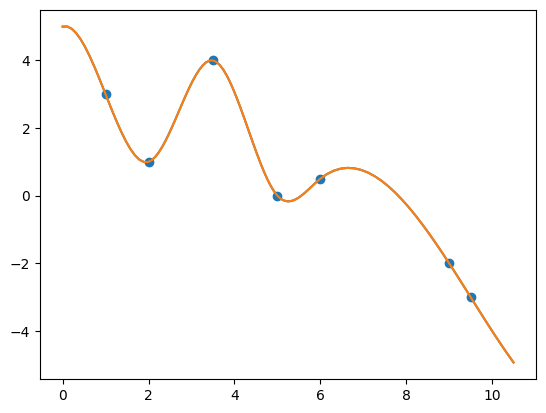

In [76]:
lista = []
IKSY = []


for i in range(data.shape[0]-1):
    if i == 0:
        iksy = np.linspace(0, data[i+1][0], 20)
    elif i == data.shape[0]-2:
        iksy = np.linspace(data[i][0], 10.5, 20)
    else:
        iksy = np.linspace(data[i][0], data[i + 1][0], 20)

    IKSY.extend(iksy)
    interpolated = S(i, iksy)
    lista.extend(interpolated)
else:
    plt.scatter(data[:,0], data[:,1])
    plt.plot(IKSY, lista)
    cs = CubicSpline(data[:,0], data[:,1], bc_type='natural')
    plt.plot(IKSY, cs(IKSY))
    plt.show()